# ***ACTIVIDAD 1 - PROCESAMIENTO DE IMAGENES CON IA***
#   Sergio López y Víctor Morcillo

Objetivo

El objetivo de esta tarea es, simplemente, contar.

Contar de manera automática los diferentes elementos (células y líneas) que aparecen en las dos imágenes proporcionadas
Para ello, harás uso de todo lo visto en clase en los Bloques 1 y 2 principalmente, aunque seguramente puedas ayudarte del Bloque 3.

Datos

Hay dos imágenes donde tendrás que contar los elementos existentes:

lineas_coloreadas.jpgLinks to an external site.
lymphopenia.avifLinks to an external site.
Ambas imágenes son enlaces a OneDrive de Microsoft (tal y como hemos visto en clase). Una de ellas, como puedes ver, tiene formato AVIF. Esto no debe suponerte ningún problema.

Entrega y evaluación

La entrega constará de dos cosas:

Un enlace a GitHub donde se habrá subido el archivo .ipynb.
 El archivo .ipynb, al ejecutarse, no deberá producir ningún error y yo, como evaluador, deberé poder ejecutarlo sin necesidad de ningún archivo adicional.

Un enlace a Confluence donde residirá la memoria escrita del trabajo realizado.

En dicha memoria se valorará:

Los resultados obtenidos y la descripción de los mismos

La metodología y estrategias empleadas para resolver el problema
Se valorará positivamente si el código escrito es propio (y no meramente copiado)

Se valorará el aspecto, la redacción y la presentación de la memoria escrita
Es necesario darme acceso a alberto.desantos@ufv.es para que pueda leer la memoria.

Comprobar que tengo acceso es responsabilidad vuestra PREVIO a la fecha de entrega

Si tras el día de la entrega, no tengo acceso, la calificación será de 0
La entrega se realizará antes del 31 de octubre a las 23.59


Consideraciones importantes

El número de elementos a contar es desconocido.

Las actitudes de plagio (parcial o total) serán penalizadas con una calificación de 0 para las partes implicadas.

Es muy difícil que ChatGPT dé exáctamente el mismo código, luego se asumirá que todo código "igual" es fruto de una acción intencionada.

Aunque puedes usar herramientas de IA para dar forma a tu código, vosotros sois los responsables del código que copies/adapteis.

Si copias código de ChatGPT/Gemini, tómate tu tiempo para entender el código primero. Dichas herramientas pueden explicarte el código y esto te ayudará a aprender.


In [1]:
# Subimos las fotos desde onedrive
!pip install onedrivedownloader
from onedrivedownloader import download

PATH_FILE = 'https://universidadfv-my.sharepoint.com/:i:/g/personal/9105559_alumnos_ufv_es/EdnxKuztBi9GgH5bJNJz2r0B8F62MDuHiVF0vZP8W_CIpg?e=yvzhhW'
download(url = PATH_FILE, filename = 'Imagen1.jpeg', unzip=False, force_download=True, clean=False)

PATH_FILE = 'https://universidadfv-my.sharepoint.com/:u:/g/personal/9105559_alumnos_ufv_es/Ee0ZdX_ksPdCkOxhHnST_d4BWrgAioQ3x3IVxp9OAaMZKg?e=tg9ocz'
download(url = PATH_FILE, filename = 'Imagen2.jpeg', unzip=False, force_download=True, clean=False)

100%|██████████| 260k/260k [00:00<00:00, 320kiB/s]
100%|██████████| 144k/144k [00:00<00:00, 236kiB/s]


'Imagen2.jpeg'

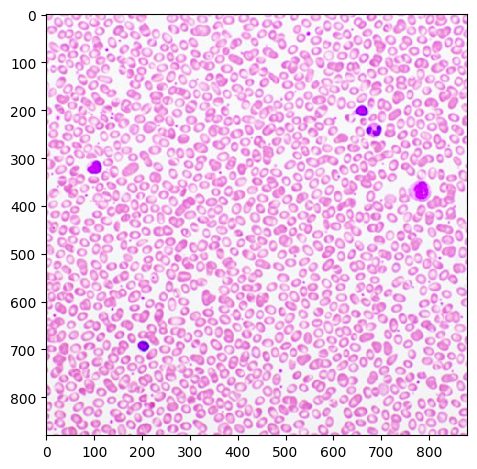

Dimensiones Imagen 1:  (880, 880, 3)


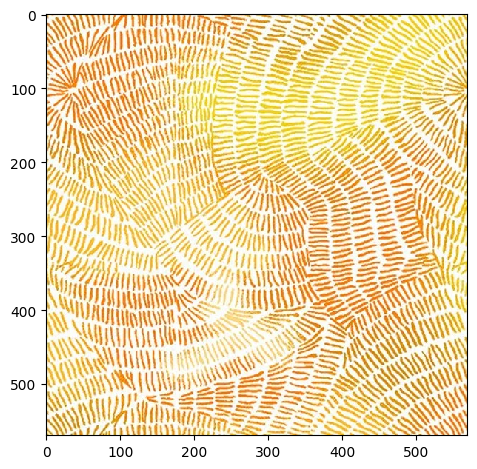

Dimensiones Imagen 2:  (570, 570, 3)


In [2]:
#LEEMOS LA IMAGEN
from skimage import io

#Cargar la imagen
imagen1 = io.imread("/content/Imagen1.jpeg")
#Mostrar la imagen
io.imshow(imagen1)
io.show()
print("Dimensiones Imagen 1: ",imagen1.shape)

#Cargar la imagen
imagen2 = io.imread("/content/Imagen2.jpeg")
#Mostrar la imagen
io.imshow(imagen2)
io.show()
print("Dimensiones Imagen 2: ",imagen2.shape)


Número estimado de células: 1875


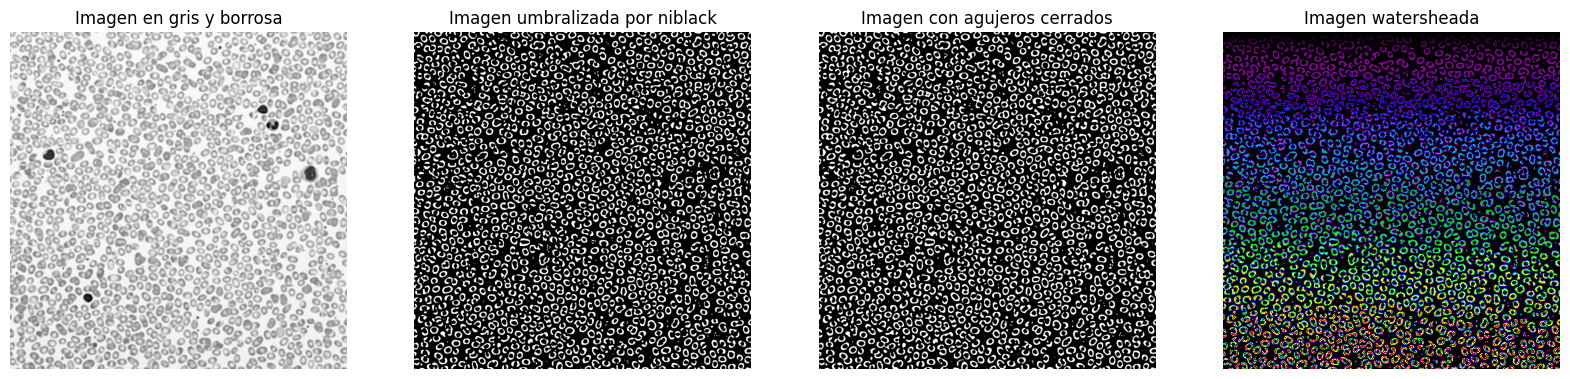

In [17]:
#IMAGEN  1

import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.morphology import erosion, disk, dilation, closing
from skimage.filters import threshold_niblack
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Cargar la imagen
imagen1 = cv2.imread("/content/Imagen1.jpeg")

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(imagen1, cv2.COLOR_BGR2GRAY)

# Aplicar un filtro de desenfoque gaussiano
blurred_image = gaussian(gray, sigma=0.5)

# Aplicar umbralización local
niblack_thresh = threshold_niblack(blurred_image, window_size=15, k=0.7)
binary_niblack = blurred_image < niblack_thresh
closed_image = closing(binary_niblack, disk(2)) #Cerrado de agujeros

# Aplicar la transformación de distancia
distance = ndimage.distance_transform_edt(closed_image)

# Identificar picos locales para usarlos como marcadores
local_maxi = peak_local_max(distance, footprint=np.ones((3, 3)), labels=closed_image)

# Asegurarse de que local_maxi tiene las dimensiones correctas
if local_maxi.ndim == 2:
    markers = np.zeros_like(closed_image, dtype=bool)  # Crear una máscara booleana
    markers[local_maxi[:, 0], local_maxi[:, 1]] = True  # Marcar los picos locales

    markers, _ = ndimage.label(markers)  # Etiquetar los picos locales
else:
    raise ValueError("local_maxi debe ser un arreglo 2D.")

# Aplicar watershed
imagen_watersheada = watershed(-distance, markers, mask=closed_image)

# Etiquetar las regiones conectadas
labeled_array, num_cells = ndimage.label(imagen_watersheada)

# Mostrar resultados
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(blurred_image, cmap="gray")
axes[0].set_title("Imagen en gris y borrosa")
axes[1].imshow(binary_niblack, cmap="gray")
axes[1].set_title("Imagen umbralizada por niblack")
axes[2].imshow(closed_image, cmap="gray")
axes[2].set_title("Imagen con agujeros cerrados")
axes[3].imshow(imagen_watersheada,"nipy_spectral" )
axes[3].set_title("Imagen watersheada")

for ax in axes:
    ax.axis("off")

print(f"Número estimado de células: {num_cells}")

plt.show()


Número estimado de células: 1508


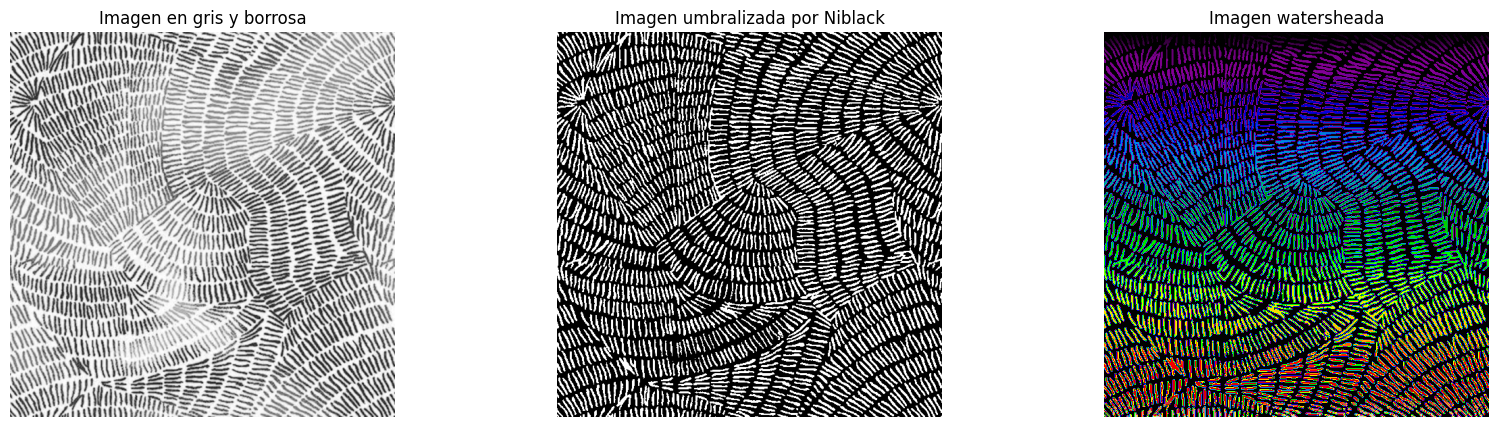

In [16]:
#IMAGEN 2

import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage.filters import gaussian, threshold_niblack
from skimage.color import rgb2gray
from skimage.morphology import erosion, disk, dilation
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Cargar la imagen
imagen2 = cv2.imread("/content/Imagen2.jpeg")

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(imagen2, cv2.COLOR_BGR2GRAY)

# Aplicar un filtro de desenfoque gaussiano con un sigma bajo
blurred_image = gaussian(gray, sigma=0.5)

# Umbralización con Niblack
niblack_thresh = threshold_niblack(blurred_image, window_size=51, k=0.4)  # Ajusta window_size y k según tus necesidades
binary_niblack = blurred_image < niblack_thresh

# Aplicar la transformación de distancia
distance = ndimage.distance_transform_edt(binary_niblack)

# Identificar picos locales para usarlos como marcadores
local_maxi = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary_niblack)

# Crear marcadores para la segmentación por watershed
markers = np.zeros_like(binary_niblack, dtype=int)  # Crear una máscara de enteros
markers[tuple(local_maxi.T)] = 1  # Marcar los picos locales
markers, _ = ndimage.label(markers)  # Etiquetar los picos locales

# Asegurarse de que la máscara y la imagen tienen la misma forma
binary_niblack_resized = cv2.resize(binary_niblack.astype(np.uint8), distance.shape[::-1], interpolation=cv2.INTER_NEAREST)

# Aplicar watershed
imagen_watershed = watershed(-distance, markers, mask=binary_niblack_resized)

# Operaciones morfológicas
dilated_image = dilation(imagen_watershed, disk(1))  # Dilatación para engrosar los bordes
eroded_image = erosion(dilated_image, disk(1))    # Erosión para hacer los bordes más finos

# Etiquetar las regiones conectadas en la imagen dilatada
labeled_array, num_cells = ndimage.label(imagen_watershed)

# Mostrar resultados
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(blurred_image, cmap="gray")
axes[0].set_title("Imagen en gris y borrosa")
axes[1].imshow(binary_niblack, cmap="gray")
axes[1].set_title("Imagen umbralizada por Niblack")
axes[2].imshow(imagen_watershed, cmap="nipy_spectral")
axes[2].set_title("Imagen watersheada")

for ax in axes:
    ax.axis("off")

print(f"Número estimado de células: {num_cells}")

plt.show()
